                                                  TASK 1

Create a model to predict the likelihood of a disease
based on medical data (e.g., symptoms, patient
history). Use datasets with labeled medical records and
apply classification algorithms

In [1]:
# importing the all necessary libraries for the tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn

In [2]:
# reading the data of heart.csv file 

data=pd.read_csv("heart.csv")

In [3]:
# Printing the readed data 

data.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [4]:
# finding for missing values in the dataset

data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

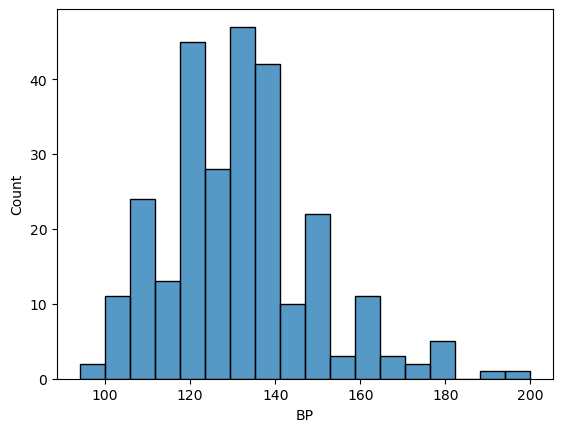

In [5]:
sn.histplot(data=data,x="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

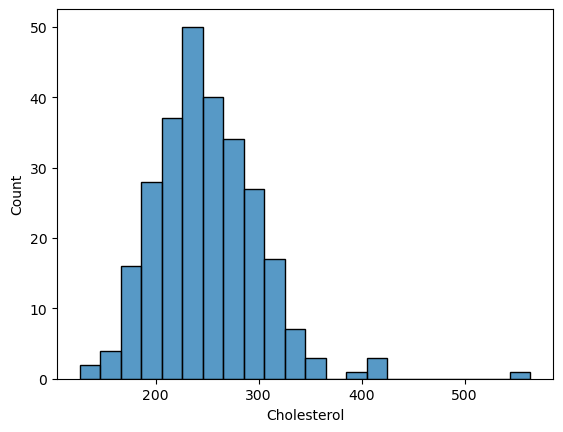

In [6]:
sn.histplot(data=data,x="Cholesterol")

<Axes: xlabel='Max HR', ylabel='Count'>

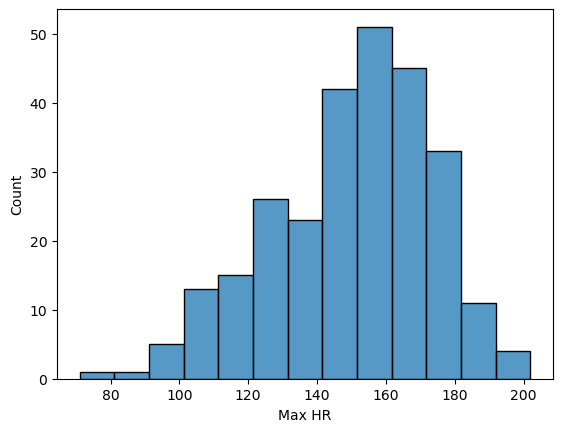

In [7]:
sn.histplot(data=data,x="Max HR")

<Axes: xlabel='ST depression', ylabel='Count'>

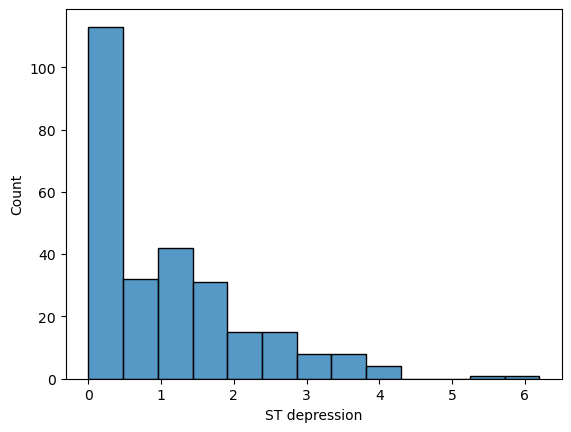

In [8]:
sn.histplot(data=data,x="ST depression")

<Axes: xlabel='Sex', ylabel='Age'>

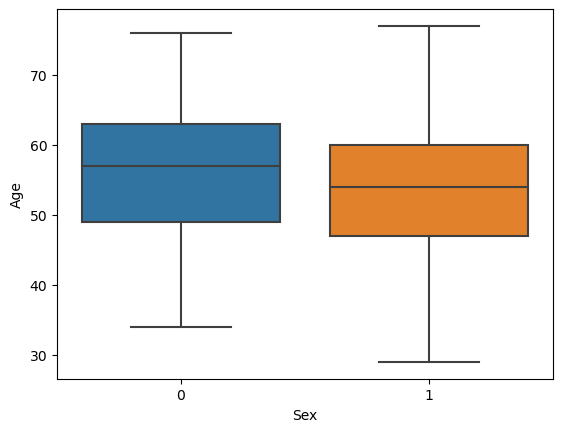

In [12]:
sn.boxplot(data=data,x="Sex",y="Age")

In [18]:
# importing the libraries for performing the classifictaion

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [19]:
# Selecting the features for classification

x=data[["BP","Max HR","Cholesterol"]]
y=data["Heart Disease"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [20]:
ss=StandardScaler()

In [21]:
# Scaling down the values for independent variable for imporving the result of the model

xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [22]:
gnb=GaussianNB()

In [24]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [28]:
ypred=gnb.predict(xtest)
ypred

array(['Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presenc

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
report=classification_report(ytest,ypred)
report

'              precision    recall  f1-score   support\n\n     Absence       0.71      0.80      0.75        50\n    Presence       0.71      0.60      0.65        40\n\n    accuracy                           0.71        90\n   macro avg       0.71      0.70      0.70        90\nweighted avg       0.71      0.71      0.71        90\n'

In [32]:
matrix=confusion_matrix(ytest,ypred)
matrix

array([[40, 10],
       [16, 24]], dtype=int64)

Text(0.5, 1.0, 'Heart Dieases')

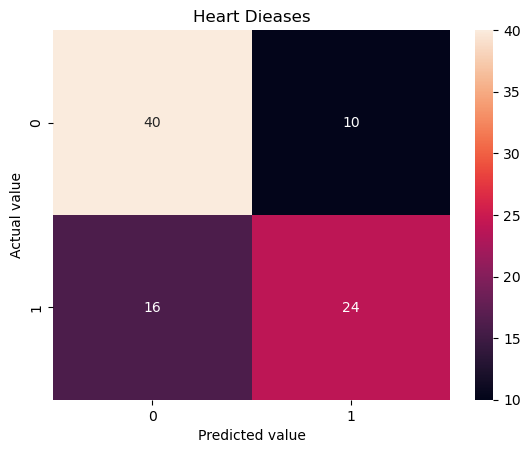

In [36]:
sn.heatmap(matrix,annot=True)
pl.xlabel("Predicted value")
pl.ylabel("Actual value")
pl.title("Heart Dieases")